In [2]:
!pip install opendatasets
!pip install xgboost

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:

import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data")

Skipping, found downloaded files in ".\bank-account-fraud-dataset-neurips-2022" (use force=True to force download)


In [ ]:
import pandas as pd


data = pd.read_csv("/content/bank-account-fraud-dataset-neurips-2022/Base.csv")



In [8]:
# import libraries


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

X = data.drop('fraud_bool', axis = 1)
y = data['fraud_bool']

# Let's only work with a few quantitative features

features = ['income',
       'customer_age',
       'credit_risk_score', 'proposed_credit_limit', 'name_email_similarity']


# Scaling data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

# Add some categorical features

cat = ['device_os','housing_status', 'keep_alive_session']

# One hot encode them

X_cat_encode = pd.get_dummies(X[cat], drop_first=True, columns= cat)

X_new = pd.concat([X_scaled_df,X_cat_encode], axis = 1)

# X_new.head()




In [9]:


from sklearn.decomposition import PCA

X_num = data.select_dtypes(include = [np.number])
X_num = X_num.drop(columns = ['fraud_bool'])
X_num_scaled = scaler.fit_transform(X_num)


pca = PCA(0.95)
X_pca = pca.fit_transform(X_num_scaled)

X_new = np.hstack((X_pca, X_cat_encode.values))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.1, stratify=y , random_state=42)




array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [45]:
smote = SMOTE(random_state=48)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)




In [46]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression( 
    random_state=42)
reg_model.fit(x_resampled, y_resampled)

LogisticRegression(random_state=42)

In [51]:
recall = []
precision = [] 
threshold = np.arange(0.0,1.0,0.01)

for i in threshold:
    y_out = reg_model.predict_proba(x_test)[:, 1]
    y_pred = (y_out >= i).astype(int)
    cofm = confusion_matrix(y_test, y_pred)
    r = cofm[1][1]/(cofm[1][1] + cofm[1][0])
    p = cofm[1][1]/(cofm[1][1]+cofm[0][1])
    recall.append(r)
    precision.append(p)
    



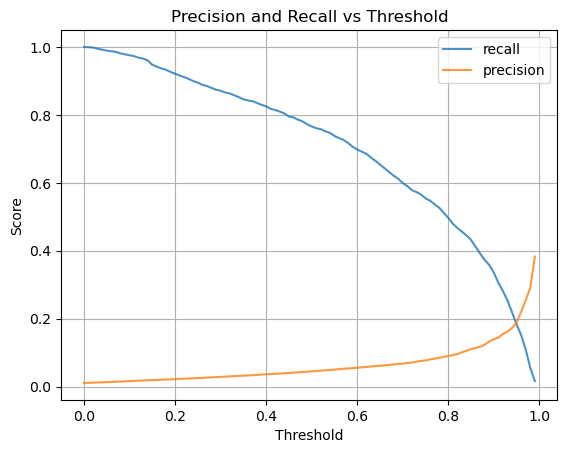

In [52]:


sns.lineplot(x = threshold, y = recall, alpha=0.8, label = 'recall')
sns.lineplot(x = threshold, y = precision, alpha = 0.8, label = 'precision')


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\arpit\AppData\Local\Temp\ipykernel_37852\3026048146.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


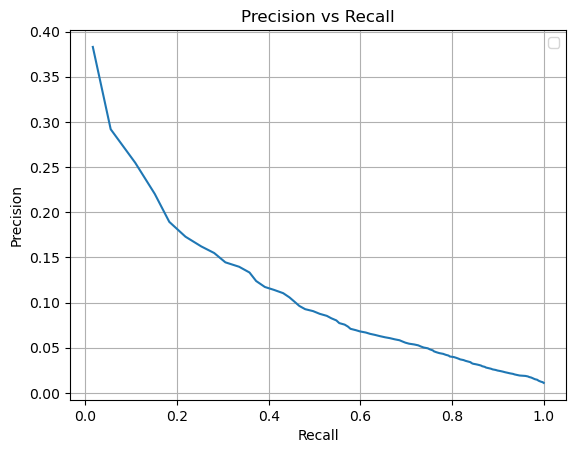

In [54]:
sns.lineplot(x=recall, y=precision)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\arpit\AppData\Local\Temp\ipykernel_37852\3459120465.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


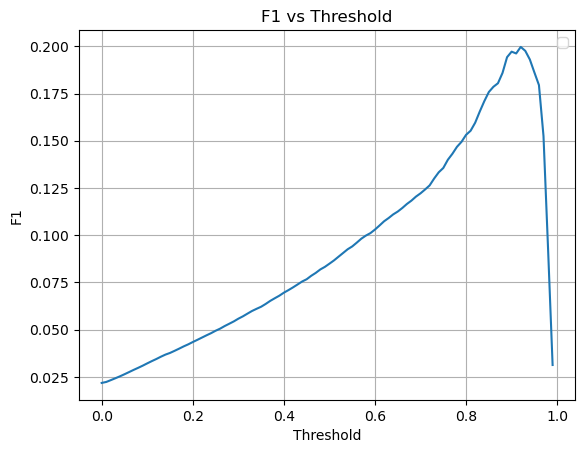

In [55]:
prec = np.array(precision)
rec = np.array(recall)

F1 = 2*prec*rec/(prec+rec)


sns.lineplot(x=threshold,y=F1)

plt.xlabel('Threshold')
plt.ylabel('F1')
plt.title('F1 vs Threshold')
plt.grid(True)
plt.legend()
plt.show()



In [56]:
#Fitting Gaussian for Numerical variables

model = GaussianNB()
model.fit(x_resampled[:, :21], y_resampled)

y_out = model.predict_proba(x_test[:, :21])[:, 1]
print(y_out)

[0.22919098 0.49116584 0.06141704 ... 0.66462589 0.05466413 0.08842545]


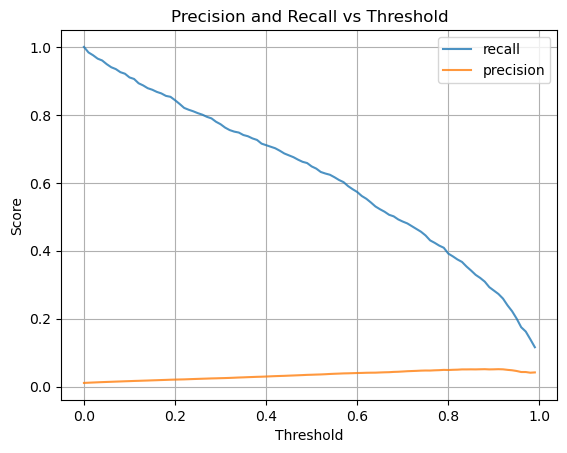

In [58]:
recall = []
precision = [] 
threshold = np.arange(0.0,1.0,0.01)

for i in threshold:
    y_out = model.predict_proba(x_test[:, :21])[:, 1]
    y_pred = (y_out >= i).astype(int)
    cofm = confusion_matrix(y_test, y_pred)
    r = cofm[1][1]/(cofm[1][1] + cofm[1][0])
    p = cofm[1][1]/(cofm[1][1]+cofm[0][1])
    recall.append(r)
    precision.append(p)
    

sns.lineplot(x = threshold, y = recall, alpha=0.8, label = 'recall')
sns.lineplot(x = threshold, y = precision, alpha = 0.8, label = 'precision')


plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Let's try XGBoost

import xgboost as xgb
from xgboost import XGBClassifier

model1 =  XGBClassifier()
model1.fit(x_resampled,y_resampled)

y_pred1 = model1.pred

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[93615  5282]
 [  607   496]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     98897
           1       0.09      0.45      0.14      1103

    accuracy                           0.94    100000
   macro avg       0.54      0.70      0.56    100000
weighted avg       0.98      0.94      0.96    100000

